In [4]:
import json
import hashlib
import inspect

In [ ]:
def get_object_hash(obj):
    class_name = obj.__class__.__name__

    # Get __init__ parameters (excluding 'self')
    init_params = inspect.signature(obj.__class__.__init__).parameters
    init_param_names = [p for p in init_params if p != "self"]

    # Extract only the explicitly passed parameters
    params = {k: str(getattr(obj, k, None)) for k in init_param_names}

    # Serialize and hash the data
    data_str = json.dumps({"class": class_name, "params": params}, sort_keys=True)
    
    return hashlib.md5(data_str.encode()).hexdigest(), data_str

In [28]:
class test():
    def __init__(self, a, b):
        self.a = a
        self.b = b
        self.c = 3

c = test(1, 2)

print(get_object_hash(c))

{"class": "test", "params": {"a": "1", "b": "2"}}
2c05d0547bbe1d46df76e1b5279d458f


In [42]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

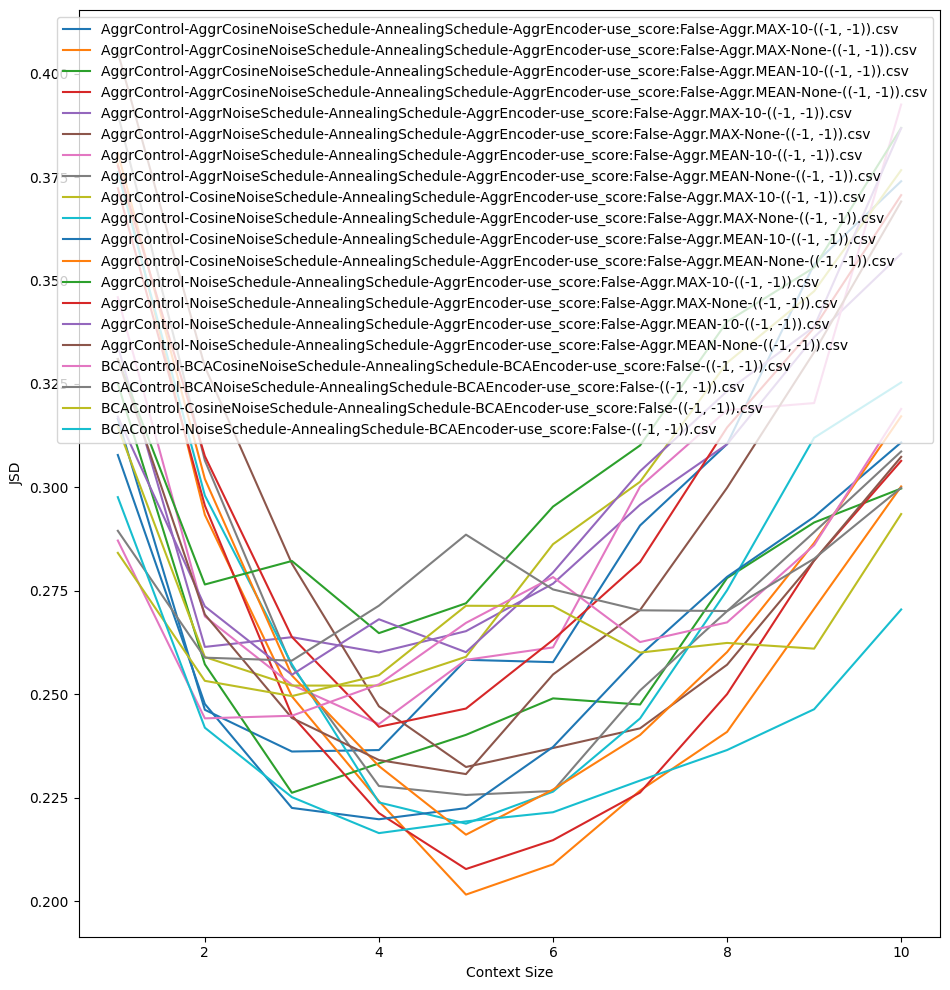

In [43]:
dir = 'use_score_False/csv'
files = sorted(os.listdir(dir))  # Ensure sorted order

plt.figure(figsize=(10, 10))

# Process files in groups of 4
group_size = 4
num_groups = len(files) // group_size

for i in range(num_groups):
    group_files = files[i * group_size : (i + 1) * group_size]
    
    # Read and stack DataFrames
    dfs = [pd.read_csv(f"{dir}/{f}", index_col=0) for f in group_files]
    
    merged_df = pd.concat(dfs, axis=1)  # Merge along columns, aligning by index
    
    # Compute row-wise mean
    avg_df = merged_df.mean(axis=1)

    # Plot
    plt.ylabel("JSD")
    plt.xlabel("Context Size")
    plt.plot(avg_df, label=group_files[0])

plt.legend()
plt.tight_layout()
plt.show()